In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%config InlineBackend.figure_format = 'retina'

In [2]:
# Generate Stephen Wolfram's rule in binary form
def rule_tab(num):
    num = np.array([num],dtype=np.uint8)
    return np.unpackbits(num)[::-1]

In [3]:
# Calculate the i-th step of any cellular automaton
def state(array,i,rule_table,window = [4,2,1]):
    row = array[i-1]
    corr = np.correlate(row,window,mode="same")
    array[i]=rule_table[corr]

In [4]:
# Generate cellular automato of any given rule and time step
def CA(rule,step,draw = True,randini = False):
    
    """
    CA(rule, time, draw = True)
    
    Calculate the array of cellular automaton.
    
    Parameters
    ----------
    
    rule: Stephen Wolfram's rule on the cellular
    automata. It lies in between 0 and 255.
    
    time: How many time steps in the calculation.
    
    draw: True returns the draw and False returns
    the array of cellular automaton.
    
    """
    # Rule checking
    if 0 <= rule <= 255:
        
        array = np.zeros((step,2*step-1),dtype=np.uint8)
        
        # Generating random initial condition?
        if randini == False:
            array[0,step-1]=1
        else:
            array[0]=np.random.randint(2, size=(2*step-1))
        
        tab = rule_tab(rule)
        
        # Calculating CA at every time step 
        for i in range(1,step):
            state(array,i,tab)
    
        # Drawing the diagram or output CA array
        if draw == True:
            plt.imshow(array,cmap="binary",interpolation="None")        
        else:
            return array
        
    else:
        print("Rule number must lies in the range between 0 and 255.")

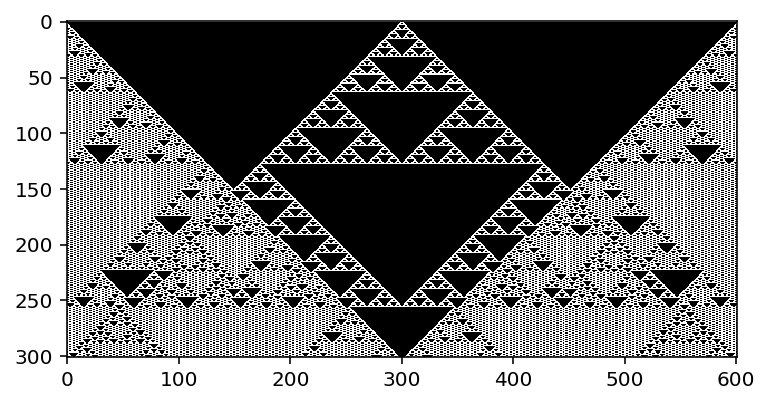

In [5]:
CA(129,301)
#plt.savefig("rule129.png",dpi=300,bbox_inches = 'tight')

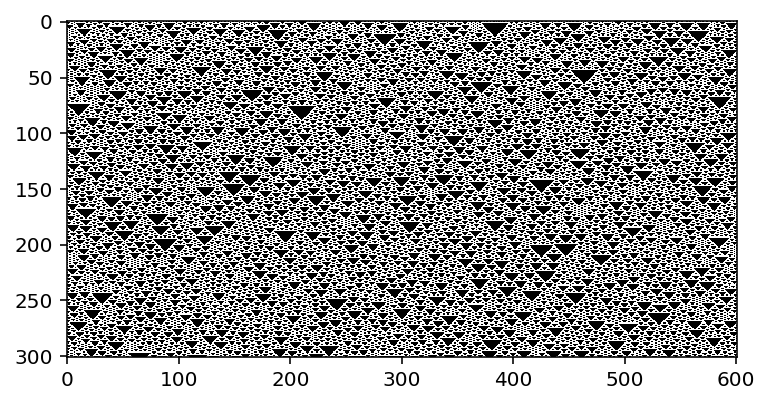

In [6]:
CA(129,301,randini=True)
#plt.savefig("rule129.png",dpi=300,bbox_inches = 'tight')

Text(0.5,1,'Rule 110')

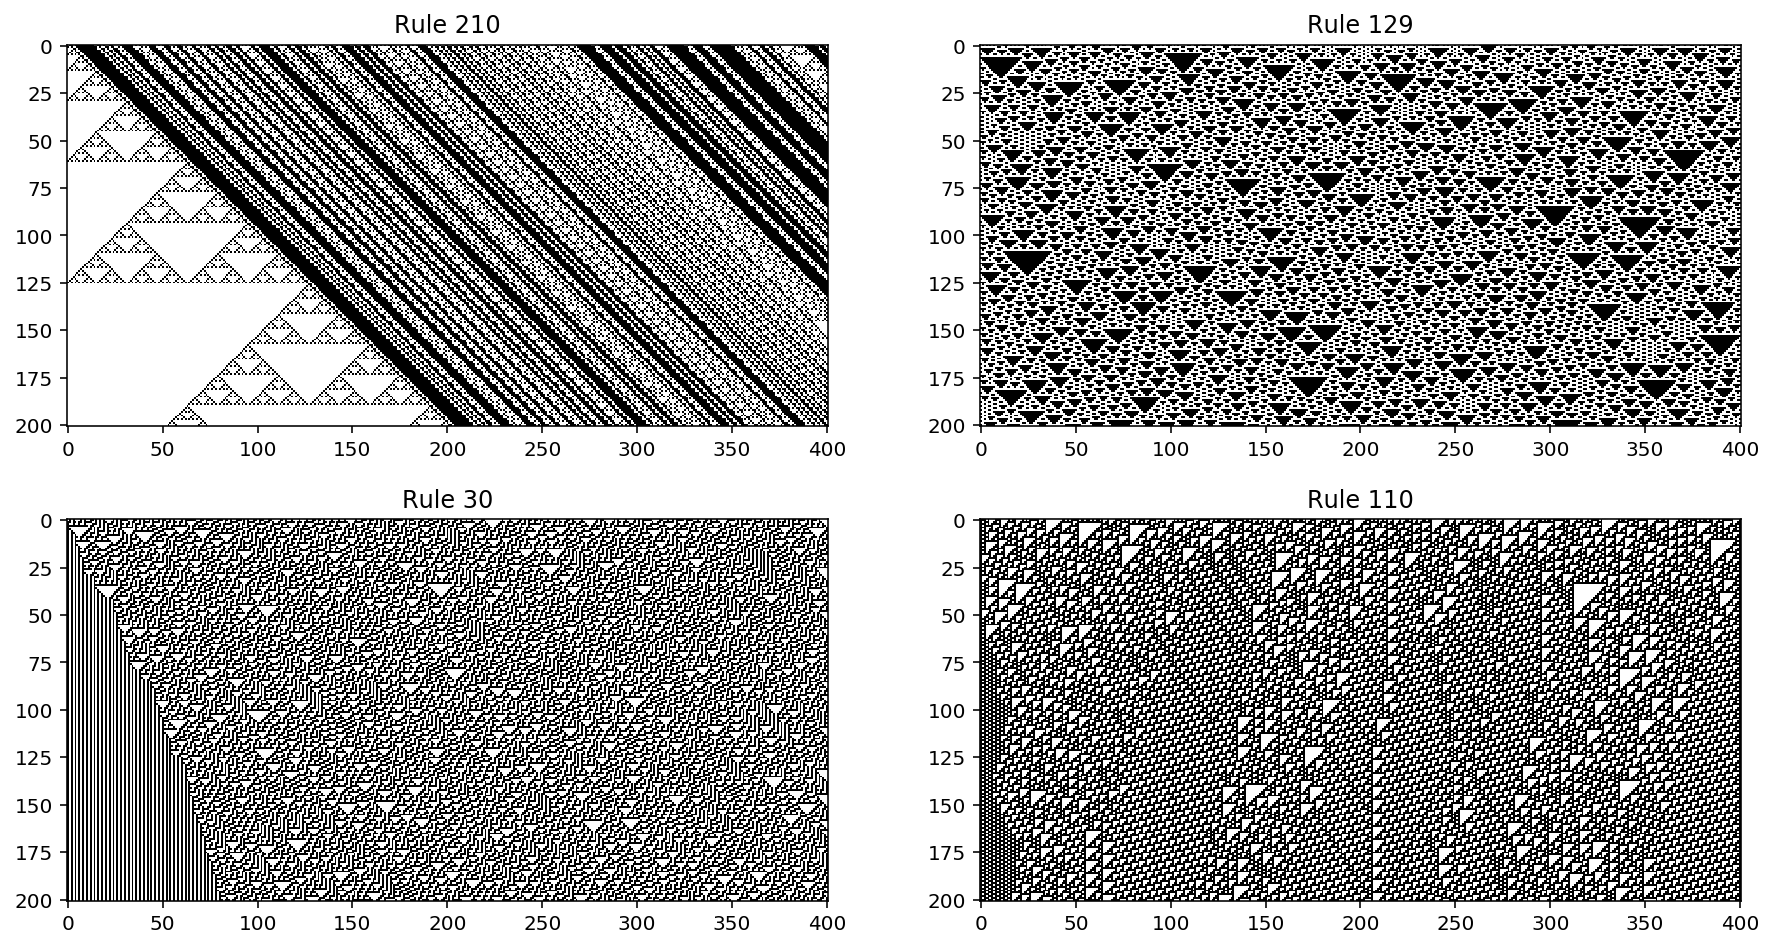

In [7]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
CA(210,201,randini=True)
plt.title("Rule 210")
plt.subplot(2,2,2)
CA(129,201,randini=True)
plt.title("Rule 129")
plt.subplot(2,2,3)
CA(30,201,randini=True)
plt.title("Rule 30")
plt.subplot(2,2,4)
CA(110,201,randini=True)
plt.title("Rule 110")
#plt.savefig("4x4.png",dpi=300,bbox_inches = 'tight')